In [1]:
import pandas as pd
import numpy as np

In [5]:
prices = pd.DataFrame({'blue':[8.7,8.91,8.71,8.43,8.73],
                      'orange':[10.66,11.08,10.71,11.59,12.11]})
prices

,blue,orange
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [13]:
prices['blue'][1:]

1    8.91
2    8.71
3    8.43
4    8.73
Name: blue, dtype: float64

In [8]:
prices['blue'][1:]/prices['blue']

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
Name: blue, dtype: float64

In [12]:
prices['blue'].shift(1)

0     NaN
1    8.70
2    8.91
3    8.71
4    8.43
Name: blue, dtype: float64

In [11]:
prices['blue'].shift(1)/prices['blue']

0         NaN
1    0.976431
2    1.022962
3    1.033215
4    0.965636
Name: blue, dtype: float64

In [15]:
prices['blue']/prices['blue'].shift(1)

0         NaN
1    1.024138
2    0.977553
3    0.967853
4    1.035587
Name: blue, dtype: float64

In [14]:
prices.pct_change()

,blue,orange
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [17]:
sample_prices = pd.read_csv('data/sample_prices.csv')
sample_prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [20]:
returns = sample_prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<AxesSubplot:>

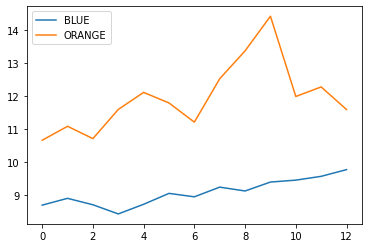

In [24]:
sample_prices.plot()

<AxesSubplot:>

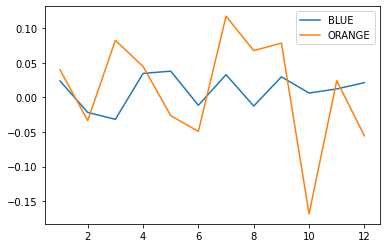

In [25]:
returns.plot()

<AxesSubplot:>

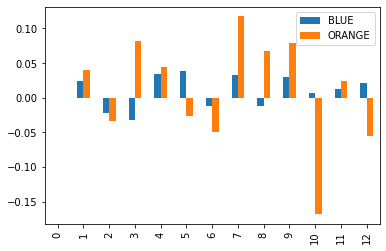

In [28]:
returns.plot.bar()

In [29]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [30]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [31]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [32]:
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [33]:
(returns+1).prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [34]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

# Annualization 

In [37]:
rm = 0.01 #monthly return
# return after 1 year
(1+rm)**12-1

0.12682503013196977

In [40]:
rq = 0.04 #quarterly return
# return after 1 year
(1+rq)**4-1

0.1698585600000002

In [43]:
rd = 0.0001 #daily return
# rd = 0.01 #daily return
# return after 1 year
(1+rd)**365-1

0.03717241130254778